<a href="https://colab.research.google.com/github/laudvs/siteBSI/blob/main/grafo_trafego_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx matplotlib


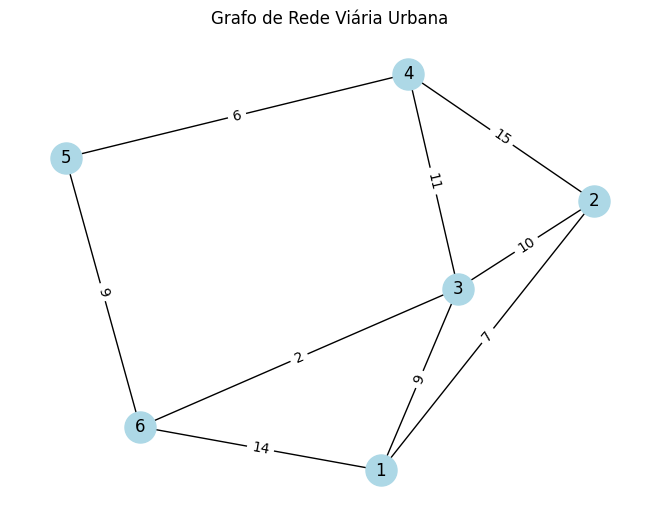

Rota mais rápida (Dijkstra) de 1 a 5: [1, 3, 6, 5]
Tempo da rota mais rápida de 1 a 5: 20 minutos
Otimização completa de tráfego (Floyd-Warshall):
Menor tempo de 1 para 1 é 0 minutos
Menor tempo de 1 para 2 é 7 minutos
Menor tempo de 1 para 3 é 9 minutos
Menor tempo de 1 para 6 é 11 minutos
Menor tempo de 1 para 4 é 20 minutos
Menor tempo de 1 para 5 é 20 minutos
Menor tempo de 2 para 2 é 0 minutos
Menor tempo de 2 para 1 é 7 minutos
Menor tempo de 2 para 3 é 10 minutos
Menor tempo de 2 para 4 é 15 minutos
Menor tempo de 2 para 5 é 21 minutos
Menor tempo de 2 para 6 é 12 minutos
Menor tempo de 3 para 3 é 0 minutos
Menor tempo de 3 para 1 é 9 minutos
Menor tempo de 3 para 2 é 10 minutos
Menor tempo de 3 para 4 é 11 minutos
Menor tempo de 3 para 6 é 2 minutos
Menor tempo de 3 para 5 é 11 minutos
Menor tempo de 4 para 4 é 0 minutos
Menor tempo de 4 para 2 é 15 minutos
Menor tempo de 4 para 3 é 11 minutos
Menor tempo de 4 para 5 é 6 minutos
Menor tempo de 4 para 1 é 20 minutos
Menor tempo 

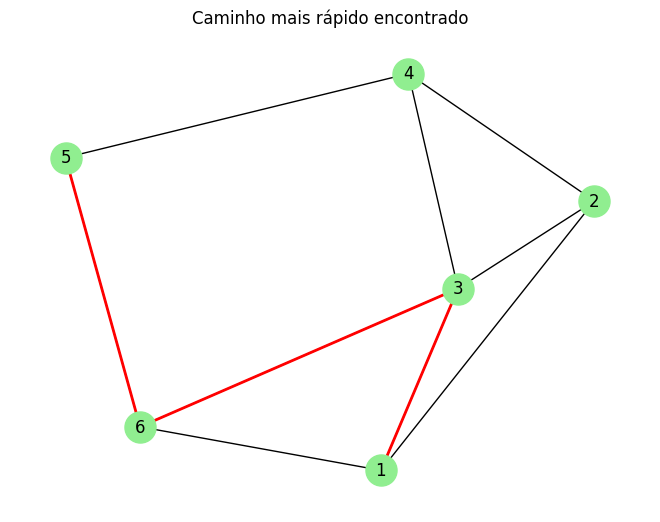

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Criação do grafo
G = nx.Graph()

# Adicionar nós (interseções)
for i in range(1, 7):
    G.add_node(i)

# Adicionar arestas (ruas) com pesos (tempo de viagem em minutos)
edges = [
    (1, 2, 7),
    (1, 3, 9),
    (1, 6, 14),
    (2, 3, 10),
    (2, 4, 15),
    (3, 4, 11),
    (3, 6, 2),
    (4, 5, 6),
    (5, 6, 9)
]

G.add_weighted_edges_from(edges)

# Desenhar o grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Grafo de Rede Viária Urbana")
plt.show()

# Algoritmo de Rota mais Rápida: menor caminho entre o nó 1 e o nó 5
rota_mais_rapida_path = nx.dijkstra_path(G, source=1, target=5)
rota_mais_rapida_length = nx.dijkstra_path_length(G, source=1, target=5)
print("Rota mais rápida (Dijkstra) de 1 a 5:", rota_mais_rapida_path)
print("Tempo da rota mais rápida de 1 a 5:", rota_mais_rapida_length, "minutos")

# Algoritmo de Otimização Completa de Tráfego: todos os caminhos mais curtos
otimizacao_completa_trafego_paths = dict(nx.floyd_warshall(G))
print("Otimização completa de tráfego (Floyd-Warshall):")
for source in otimizacao_completa_trafego_paths:
    for target in otimizacao_completa_trafego_paths[source]:
        print(f"Menor tempo de {source} para {target} é {otimizacao_completa_trafego_paths[source][target]} minutos")

# Visualizar os caminhos no grafo
rota_mais_rapida_edges = [(rota_mais_rapida_path[i], rota_mais_rapida_path[i + 1]) for i in range(len(rota_mais_rapida_path) - 1)]
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=500)
nx.draw_networkx_edges(G, pos, edgelist=rota_mais_rapida_edges, edge_color='red', width=2)
plt.title("Caminho mais rápido encontrado")
plt.show()
